<a href="https://colab.research.google.com/github/engineerchacon/Procesamiento-de-Lenguaje-Natural/blob/main/Ejercicio_de_preprocesamiento_y_normalizaci%C3%B3n_de_texto_Armando_Chac%C3%B3n_Terrazas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad:** Preparar los datos textuales para que puedan ser analizados o utilizados de manera más eficiente por algoritmos de procesamiento de lenguaje natural (PLN) o modelos de aprendizaje automático

**Realizar lo siguiente en un script de Python:**
Genere un script en Python donde aplique las técnicas de preprocesamiento y normalización de texto al dataset indicado (archivo tuits_cambio_climatico.csv) para mostrar en una gráﬁca de barras las primeras 20 palabras con mayor frecuencia y mostrar una nube de palabras. No muestre palabras que no aporten algún sentido a los tuits, muestre solo palabras relevantes. Para implementar el script Utilice funciones. El texto de los tuits está almacenado en la columna llamada ‘tuit’ del dataset. Para leer los tuits utiliza/investiga la librería Pandas.


# **Cargar Drive**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importar librerías**

In [18]:
import pandas as pd              # SOLO para leer el CSV
import re                        # Expresiones regulares (limpieza)
import string                    # Lista de signos de puntuación
import unicodedata               # Eliminar acentos
import matplotlib.pyplot as plt  # Gráficas
from collections import Counter  # Contar frecuencia de palabras

import nltk                      # Herramientas básicas de PLN
from nltk.corpus import stopwords
from wordcloud import WordCloud  # Nube de palabras

# Descargar stopwords en español
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Funciones de preprocesamiento**

In [19]:
def convertir_a_minusculas(texto):
    return texto.lower()

def eliminar_urls_hashtags_emojis(texto):
    """
    Elimina URLs, hashtags, menciones y caracteres raros (como emojis).
    Esto limpia el texto pero mantiene las palabras normales.
    """
    if not isinstance(texto, str):
        return ""

    # Eliminar URLs (http, https, www)
    texto = re.sub(r'http\S+|www\S+|https\S+', ' ', texto)

    # Eliminar hashtags (#palabra) y menciones (@usuario)
    texto = re.sub(r'#\w+', ' ', texto)
    texto = re.sub(r'@\w+', ' ', texto)

    # Eliminar caracteres que no sean letras, números, espacio, ni acentos básicos
    texto = re.sub(r'[^a-zA-Z0-9áéíóúÁÉÍÓÚñÑ\s]', ' ', texto)

    return texto

def eliminar_puntuacion(texto):
    """
    Elimina signos de puntuación del texto.
    Usa la lista de puntuación de Python (string.punctuation).
    """
    tabla = str.maketrans('', '', string.punctuation + "¿¡")
    return texto.translate(tabla)


def eliminar_acentos(texto):
    """
    Elimina acentos de las letras.
    Ejemplo: "política" -> "politica"
    """
    texto_norm = unicodedata.normalize('NFD', texto)
    texto_sin_acentos = ''.join(
        c for c in texto_norm
        if unicodedata.category(c) != 'Mn'
    )
    return texto_sin_acentos


# Creamos el conjunto de stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Podemos añadir algunas palabras que no aportan mucho en estos tuits
stopwords_es.update([
    'si', 'asi', 'aun', 'estar', 'ser', 'muy',
    'mas', 'año', 'años'
])

def tokenizar_y_filtrar(texto):
    """
    Divide el texto en palabras (tokens) y filtra:
      - stopwords (palabras vacías)
      - palabras muy cortas (<= 2 letras)
      - tokens que no sean solo letras
    Regresa una lista de palabras relevantes.
    """
    # Separar por espacios
    tokens = texto.split()

    palabras_limpias = [
        palabra for palabra in tokens
        if palabra.isalpha() and          # Solo letras
           len(palabra) > 2 and           # No palabras muy cortas
           palabra not in stopwords_es    # No stopwords
    ]
    return palabras_limpias


def procesar_tuit(texto):
    if not isinstance(texto, str):
        return []

    texto = convertir_a_minusculas(texto)
    texto = eliminar_urls_hashtags_emojis(texto)
    texto = eliminar_puntuacion(texto)
    texto = eliminar_acentos(texto)
    palabras = tokenizar_y_filtrar(texto)

    return palabras

# **Leer el dataset con pandas**

In [20]:
ruta_csv = '/content/drive/MyDrive/UACJ/Procesamiento de lenguaje natural/tuits_cambio_climatico.csv'

# Leemos el archivo .csv
df = pd.read_csv(ruta_csv)

print("Columnas del dataset:", df.columns.tolist())
print("Número de tuits:", len(df))
print("\nEjemplo de tuits originales:")
print(df['tuit'].head())

Columnas del dataset: ['tuit']
Número de tuits: 500

Ejemplo de tuits originales:
0    Excelente iniciativa de el uso de energías ren...
1    Inspirador que la contaminación plástica afect...
2    Datos muestran que los niveles de CO2 disminuy...
3    Indignante que las temperaturas globales sigan...
4    Inspirador que la deforestación continúe 🌊 #So...
Name: tuit, dtype: object


# **Aplicar preprocesamiento a todos los tuits**

In [21]:
# Creamos una nueva columna con la lista de palabras limpias de cada tuit
df['palabras_limpias'] = df['tuit'].apply(procesar_tuit)

# Unimos todas las listas de palabras en una sola lista
todas_las_palabras = [
    palabra
    for lista in df['palabras_limpias']
    for palabra in lista
]

print("\nTotal de palabras limpias:", len(todas_las_palabras))
print("Palabras únicas:", len(set(todas_las_palabras)))


Total de palabras limpias: 2471
Palabras únicas: 49


# **Frecuencia y gráfica de barras (Top 20)**


Top 20 palabras más frecuentes:
 1. emisiones       ->  78 veces
 2. gases           ->  78 veces
 3. efecto          ->  78 veces
 4. invernadero     ->  78 veces
 5. reduzcan        ->  78 veces
 6. uso             ->  72 veces
 7. energias        ->  72 veces
 8. renovables      ->  72 veces
 9. expanda         ->  72 veces
10. temperaturas    ->  67 veces
11. globales        ->  67 veces
12. sigan           ->  67 veces
13. aumentando      ->  67 veces
14. contaminacion   ->  62 veces
15. plastica        ->  62 veces
16. afecte          ->  62 veces
17. oceanos         ->  62 veces
18. niveles         ->  61 veces
19. disminuyan      ->  61 veces
20. deforestacion   ->  59 veces


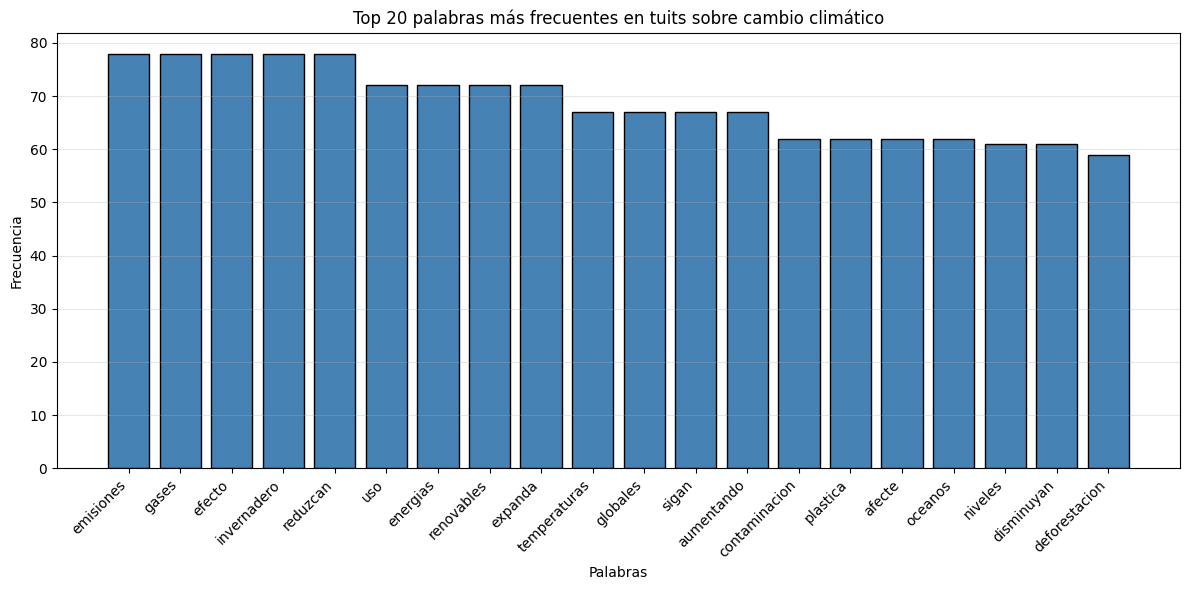

In [22]:
contador = Counter(todas_las_palabras)
top20 = contador.most_common(20)

print("\nTop 20 palabras más frecuentes:")
for i, (pal, freq) in enumerate(top20, start=1):
    print(f"{i:2d}. {pal:15s} -> {freq:3d} veces")

# Preparar datos para la gráfica
palabras = [p for p, f in top20]
frecuencias = [f for p, f in top20]

plt.figure(figsize=(12, 6))
plt.bar(palabras, frecuencias, color='steelblue', edgecolor='black')
plt.title('Top 20 palabras más frecuentes en tuits sobre cambio climático')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **Nube de palabras (WordCloud)**

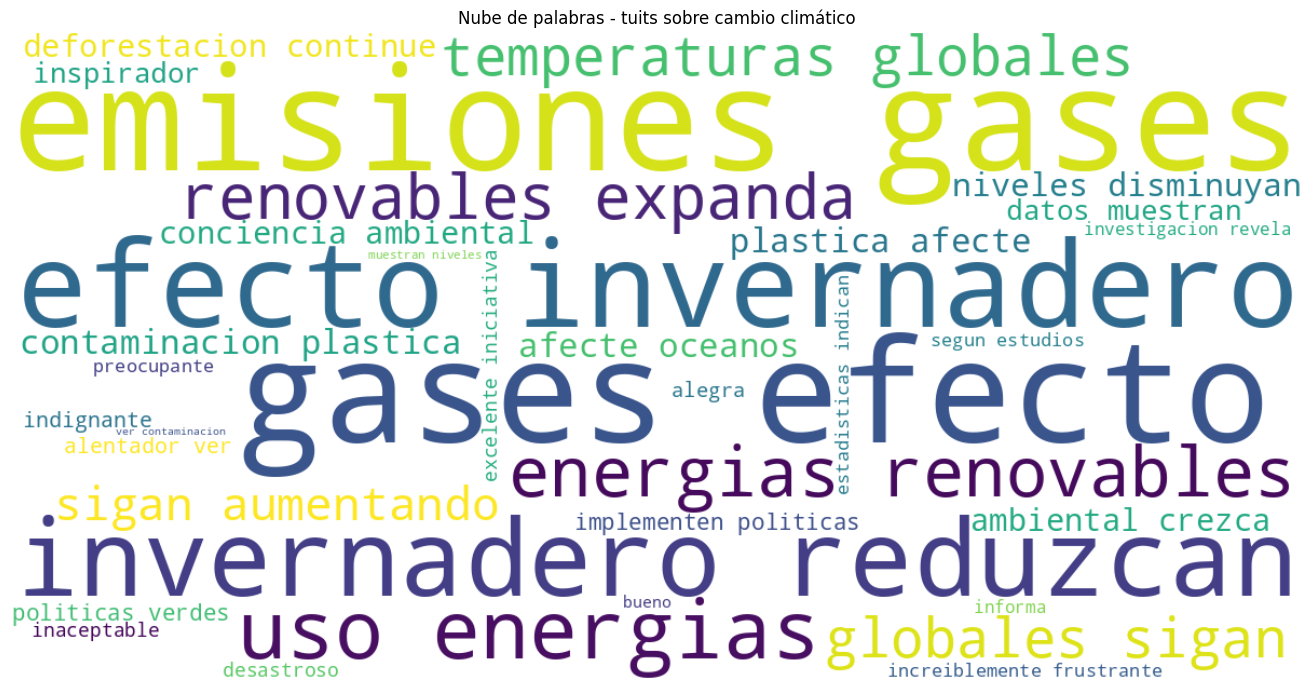

In [23]:
texto_nube = " ".join(todas_las_palabras)

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(texto_nube)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - tuits sobre cambio climático')
plt.tight_layout()
plt.show()